Name: Smita Gupta <br>
USC ID: 4123927261

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.neighbors import DistanceMetric
import math
import numpy as np

a) Reading the data from Vertebral Column Data Set</font>

In [2]:
df = pd.read_table('../Data/column_2C.dat', header = None, sep = ' ')
df.columns = ['pelvic_inc', 'pelvic_tilt', 'lumbar_angle', 'sacral_slope', 'pelvic_radius', 'grade_spondy','class']
df

,pelvic_inc,pelvic_tilt,lumbar_angle,sacral_slope,pelvic_radius,grade_spondy,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


Pre-Processing and Exploratory data analysis:<br>
b) i) Scatterplots of the independent variables in the dataset.<br>
     Color = blue for AB or '1' class<br>
     Color = red for NO or '0' class 

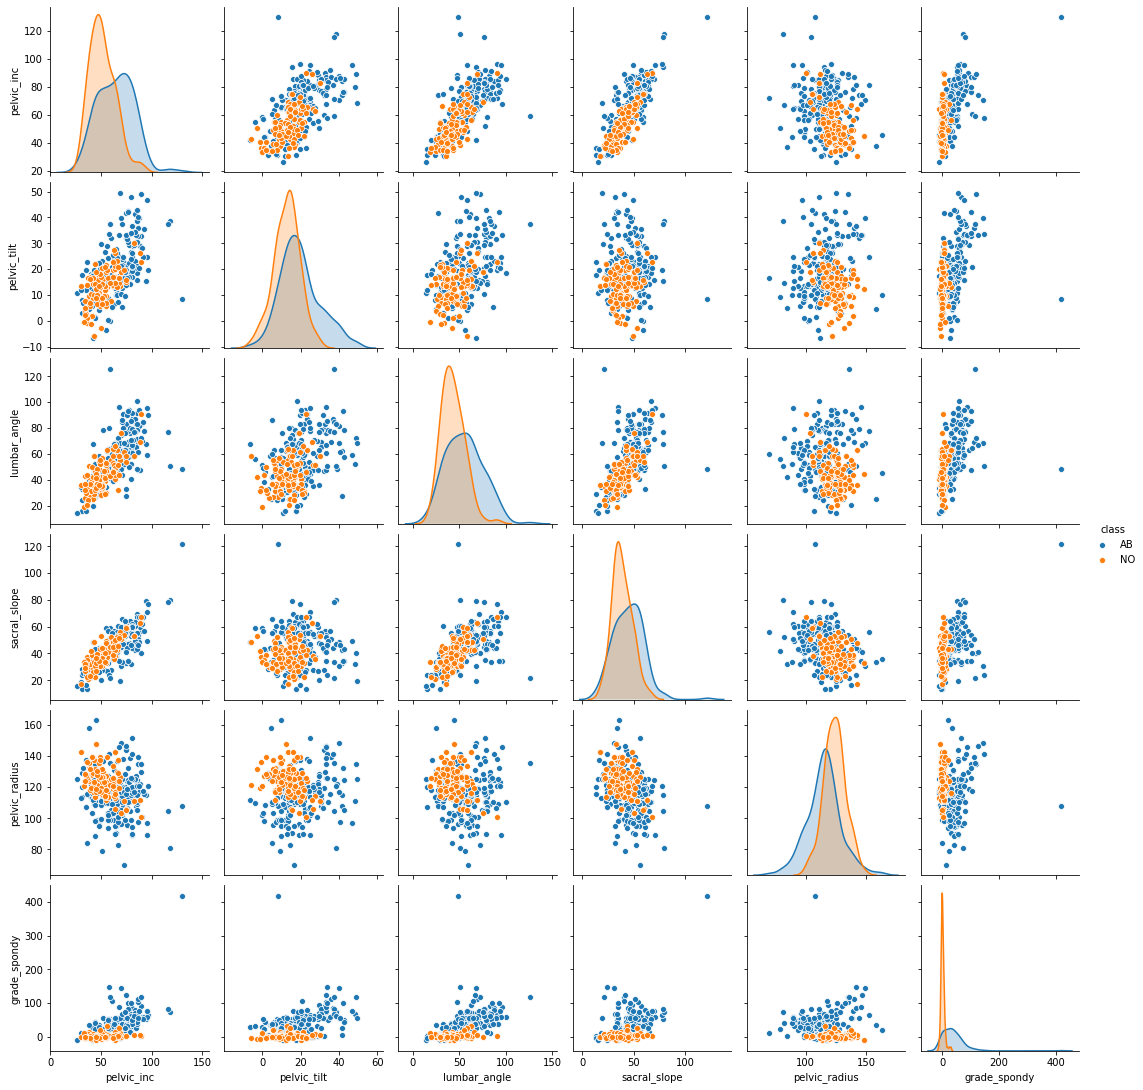

In [3]:
sns.pairplot(data = df, hue = 'class', kind = 'scatter')

b) ii) Boxplots of the independent variables in the dataset.<br>
     Color = blue for AB or '1' class<br>
     Color = red for NO or '0' class 

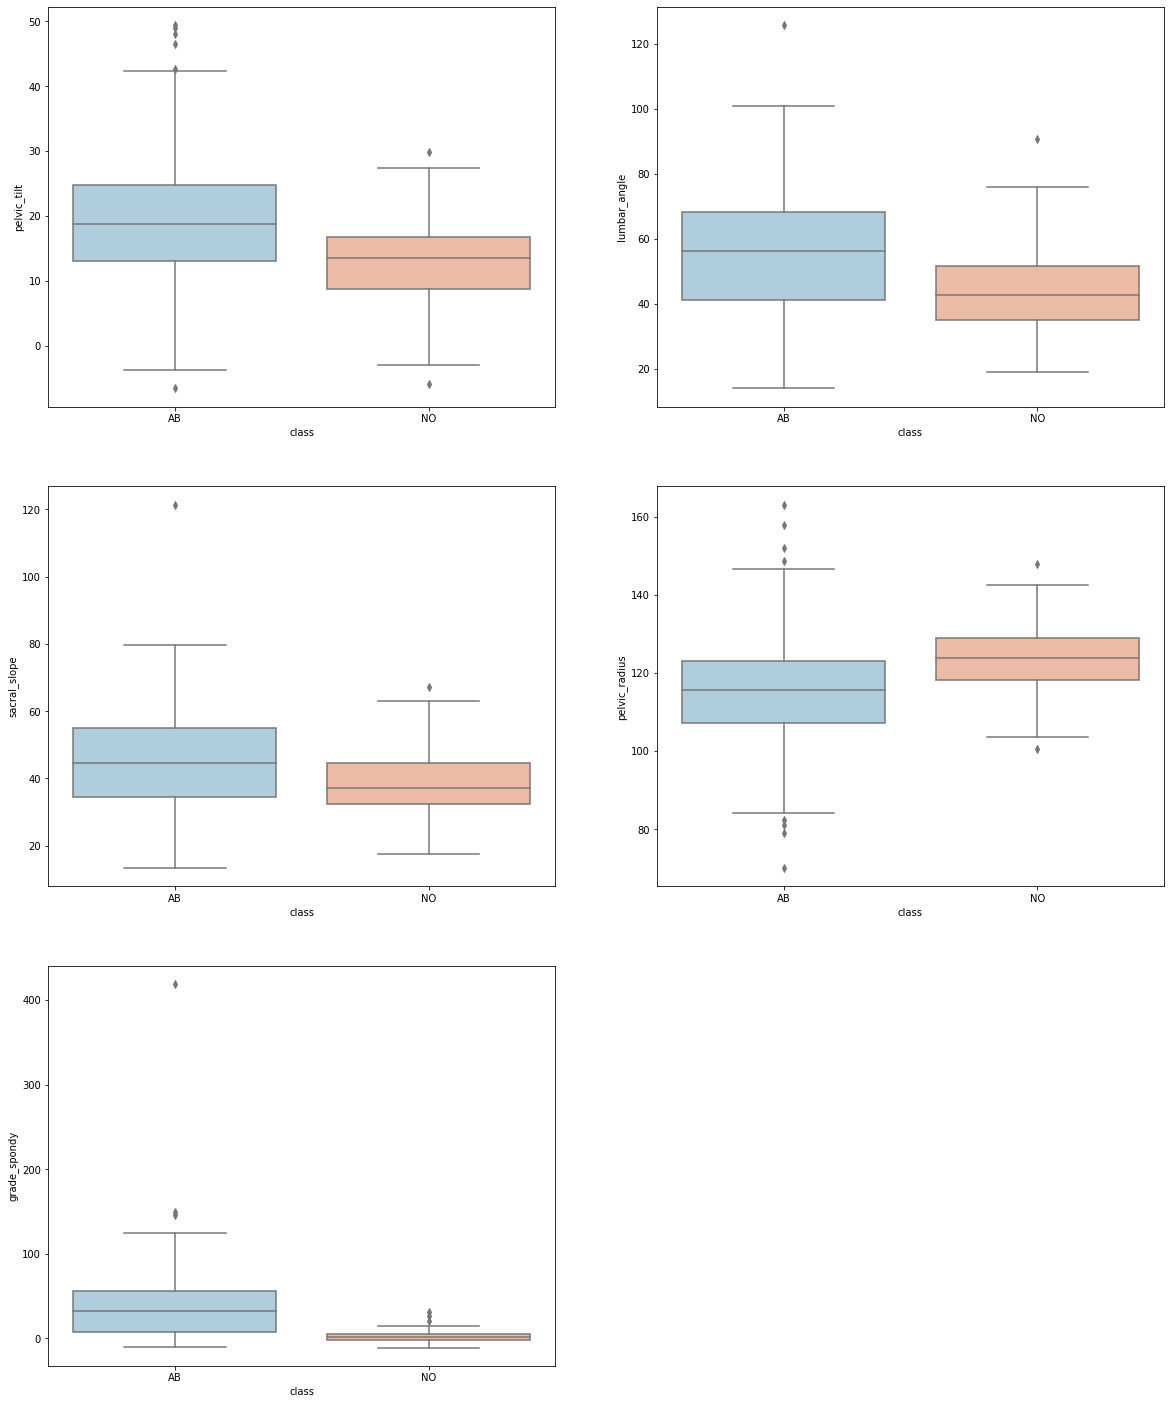

In [4]:
plt.figure(figsize=(20,25))
plt.subplot(3,2,1)
sns.boxplot(x='class',y='pelvic_tilt',data = df, palette = 'RdBu_r')
plt.subplot(3,2,2)
sns.boxplot(x='class',y='lumbar_angle',data = df, palette = 'RdBu_r')
plt.subplot(3,2,3)
sns.boxplot(x='class',y='sacral_slope',data = df, palette = 'RdBu_r')
plt.subplot(3,2,4)
sns.boxplot(x='class',y='pelvic_radius',data = df, palette = 'RdBu_r')
plt.subplot(3,2,5)
sns.boxplot(x='class',y='grade_spondy',data = df, palette = 'RdBu_r')

plt.show()

b) iii) Splitting the data into test and train data.<br>
first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [5]:
first = df

#Setting class AB = '1' and class NO = '0'
first['class'].replace('AB', '1', inplace = True)
first['class'].replace('NO', '0', inplace = True)

#Filtering data classwise
filt_ab = (df['class'] == '1')
filt_no = (df['class'] == '0')

#Slicing data classwise
test_data_no, train_data_no = df[filt_no][70:], df[filt_no][:70]
test_data_ab, train_data_ab = df[filt_ab][140:], df[filt_ab][:140]

#Concatenating to get test data data 
frame1 = [test_data_ab, test_data_no]
test = pd.concat(frame1)

#Concatenating to get train data data 
frame2 = [train_data_ab, train_data_no]
train = pd.concat(frame2)

#Splitting train and test sets into features and label respectively
train_x = train.drop('class', axis=1)
train_y = train['class']

test_x = test.drop('class', axis=1)
test_y = test['class']

c) Classification using KNN on Vertebral Column Data Set<br>
c) i) Implementing k-nearest neighbors with sklearn library<br>
<br>
Optimal value of k = 4. <br> Minimum test error is :  0.06000000000000005<br>
Minimum train error is :  0.1333333333333333
<br>
<br>
c) ii) The most suitable value of k = 4. Below are the values corresponding to k=4:<br>
    Confusion Matrix: [[25,  5],
    [ 1, 69]]<br>
    Precision: 0.9324324324324325 <br>
    F-score: 0.9583333333333333<br>
    True positive rate: 0.9857142857142858<br>
    True negative rate: 0.8333333333333334<br>
    
Using the below formulaes:<br>
    TN = CM[0][0]<br>
    FN = CM[1][0]<br>
TP = CM[1][1]<br>
FP = CM[0][1]<br> <br>   

True Positive  Rate:
TPR=TP/(TP+FN)

True Negative  Rate:
TNR = TN/(FP+TN)

Precision:
precision = TP/(TP+FP)

F-score:
fscore = 2 * (precision * TPR) / (precision + TPR)<br>

In [6]:
test_error = []
train_error = []

# Calculating test error for values of k from (1,208)
for i in range(208, 0, -3):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i_test = knn.predict(test_x)
    test_error.append(1-metrics.accuracy_score(test_y, pred_i_test))
    
# Calculating train error for values of k from (1,208)
for i in range(208, 0, -3):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(train_x)
    train_error.append(1-metrics.accuracy_score(train_y, pred_i))
    
print('Minimum test error is : ', min(test_error[1:]))
print('Minimum train error is : ', min(train_error[:-1]))

Minimum test error is :  0.06000000000000005
Minimum train error is :  0.1333333333333333


Plotting the train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order).<br>
Blue dashed curve is for k v/s Test error rate.<br>
Red dotted curve is for k v/s Train error rate.</font>

Text(0, 0.5, 'Error Rate')

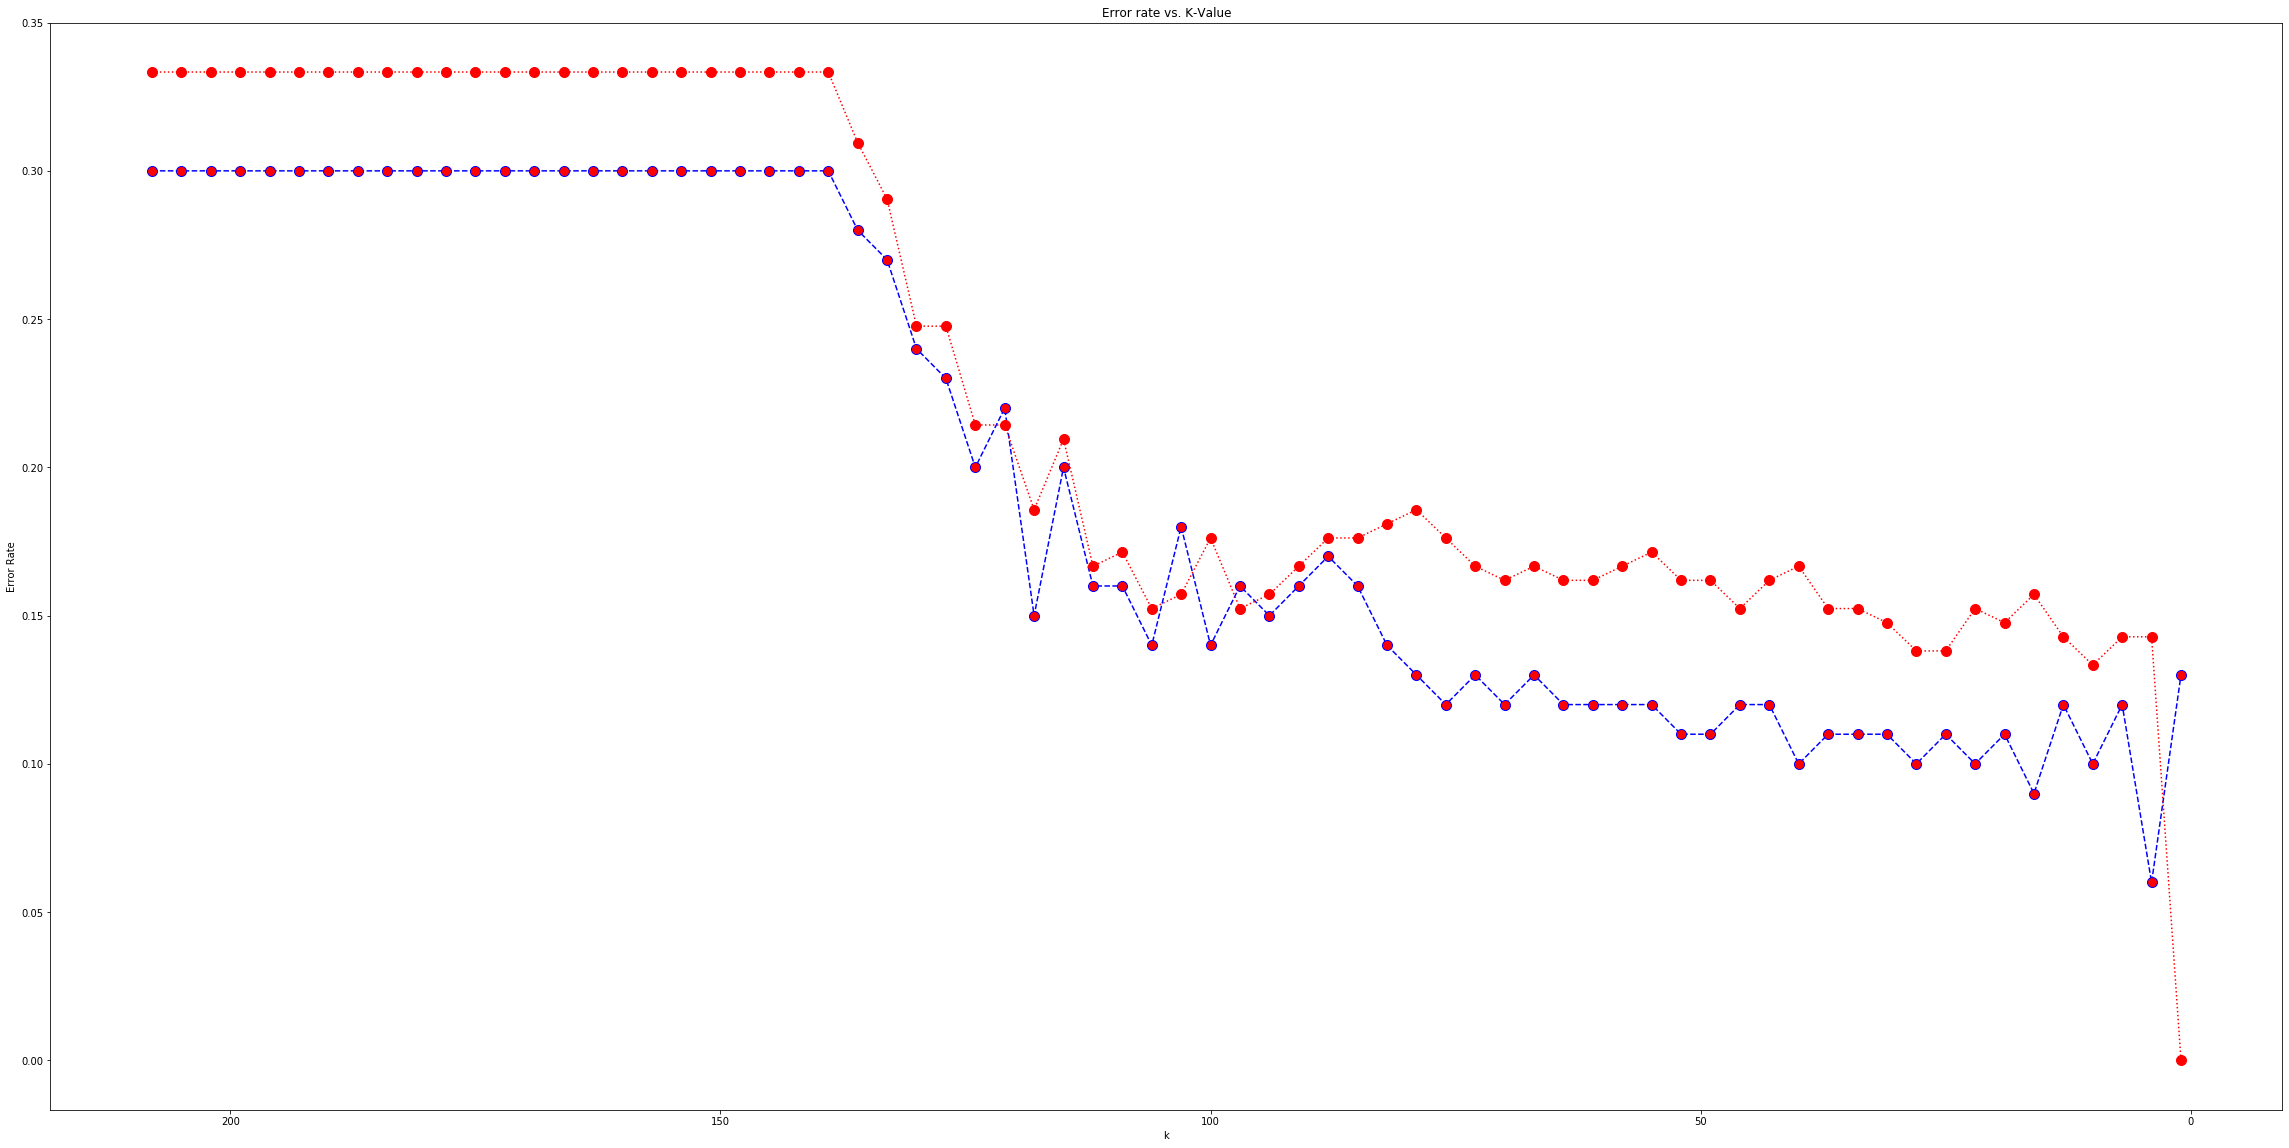

In [7]:
plt.figure(figsize=(40, 20))
plt.plot(range(208, 0, -3), test_error, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.plot(range(208, 0, -3), train_error, color='red', linestyle='dotted', 
         marker='o', markerfacecolor='red', markersize=10)
ax = plt.gca()
ax.invert_xaxis()
plt.title('Error rate vs. K-Value')
plt.xlabel('k')
plt.ylabel('Error Rate')

In [8]:
# Calculating test error for k=4
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(train_x, train_y)
pred_i_new = knn.predict(test_x)
test_error = (1-metrics.accuracy_score(test_y, pred_i_new))

metrics.accuracy_score(test_y, pred_i_new)

print(classification_report(test_y, pred_i_new))
print('Test error for k=4 is: ', test_error)

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100

Test error for k=4 is:  0.06000000000000005


In [9]:
#Confusion matrix
CM = metrics.confusion_matrix(test_y, pred_i_new)
print('Confusion matrix: ', CM)

Confusion matrix:  [[25  5]
 [ 1 69]]


In [10]:
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

#True Positive  Rate
TPR=TP/(TP+FN)
print('True Positive  Rate: ', TPR)

#True Negative  Rate
TNR = TN/(FP+TN)
print('True Negative  Rate: ', TNR)

#Precision
precision = TP/(TP+FP)
print('Precision: ', precision)

#F-score
fscore = 2 * (precision * TPR) / (precision + TPR)
print('F-score: ', fscore)

True Positive  Rate:  0.9857142857142858
True Negative  Rate:  0.8333333333333334
Precision:  0.9324324324324325
F-score:  0.9583333333333333


c) iii) Creating subsets of the training set where the size of training set is N ∈ {10,20,30,...,210}.<br>
for each N, I've printed the optimal k from a set starting from k = 1, increasing by 5 and the minimum test error.<br> I've also Plotted the best test error rate,2 which is obtained by some value of k, against the size of training set.
    <br><br>
    The optimal value of k is k = 6 for N = 210.    

In [11]:
train_errf = []
kvalue = []
    
def smita(N):
    size_class0 = math.floor(N/3)
    size_class1 = N - size_class0 

    train_data_no, train_data_ab = df[filt_no][:size_class0], df[filt_ab][:size_class1]

    frame = [train_data_ab, train_data_no]
    train_f = pd.concat(frame)

    mink = -1
    min_error = 1
    
    train_xf = train_f.drop('class', axis=1)
    train_yf = train_f['class']

    k=1
    while(k <= N):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train_xf, train_yf)
        pred_if = knn.predict(test_x)
        error_loop =1-metrics.accuracy_score(test_y, pred_if)
        if(error_loop < min_error):
            min_error = error_loop
            mink = k
        k = k+5
            
    train_errf.append(min_error)
    kvalue.append(mink)      
      
best_err_rates = [(n, smita(n)) for n in range(10, 220, 10)]

index = 0
print('N\tk\terror')
for i in range(10,220,10):
    print('{}\t{}\t{}'.format(i,kvalue[index],train_errf[index]))
    index = index +1

N	k	error
10	1	0.25
20	6	0.19999999999999996
30	1	0.21999999999999997
40	11	0.25
50	26	0.30000000000000004
60	21	0.29000000000000004
70	26	0.29000000000000004
80	31	0.29000000000000004
90	41	0.29000000000000004
100	6	0.25
110	6	0.21999999999999997
120	16	0.17000000000000004
130	16	0.16000000000000003
140	16	0.15000000000000002
150	16	0.13
160	6	0.13
170	6	0.13
180	6	0.09999999999999998
190	6	0.08999999999999997
200	6	0.08999999999999997
210	6	0.07999999999999996


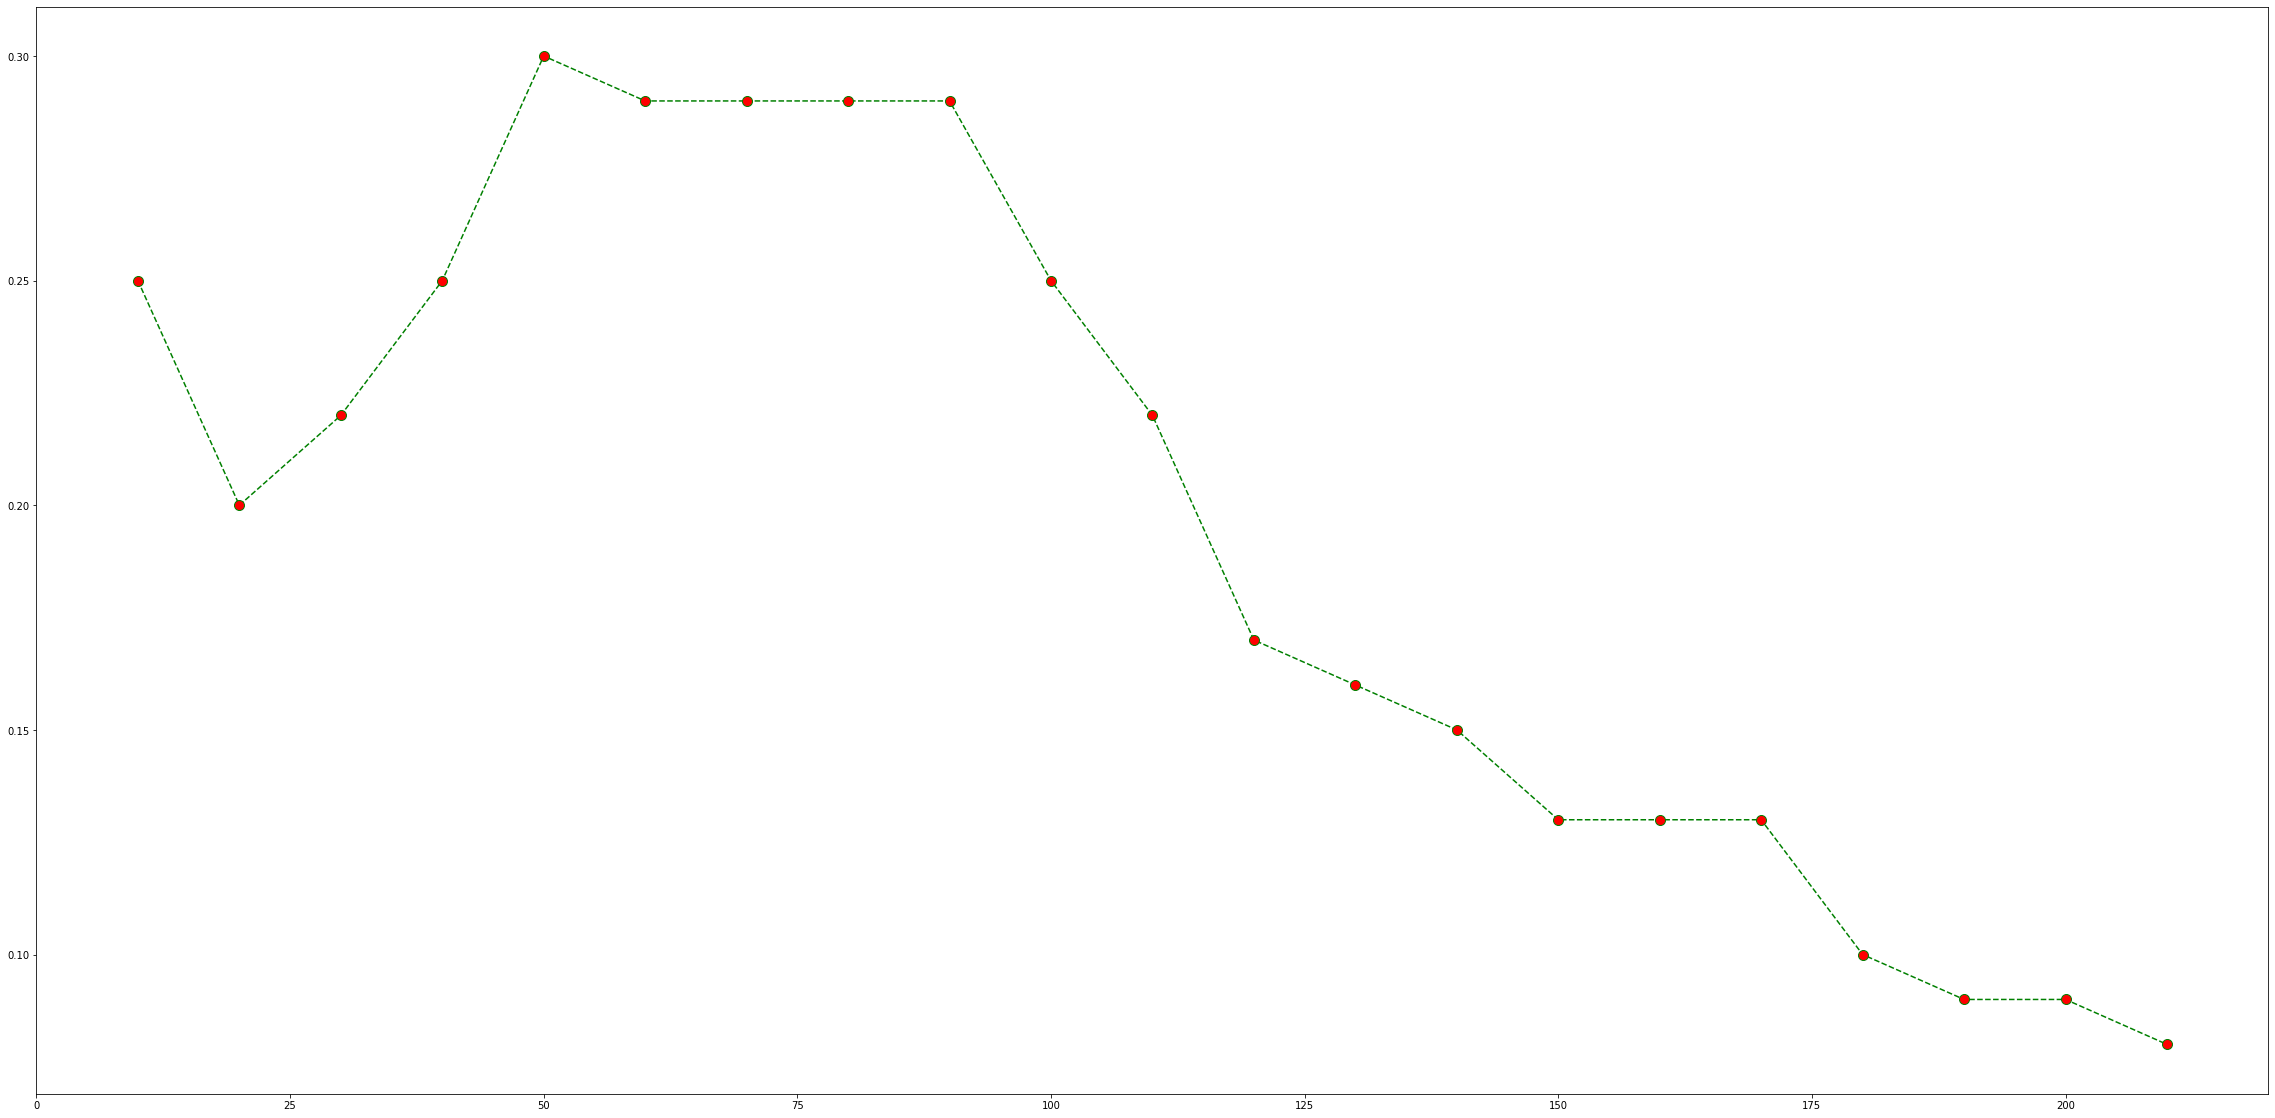

In [12]:
#Learning curver for N v/s best test error rate
plt.figure(figsize=(40, 20))
plt.plot(range(10, 220, 10), train_errf, color='green', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)

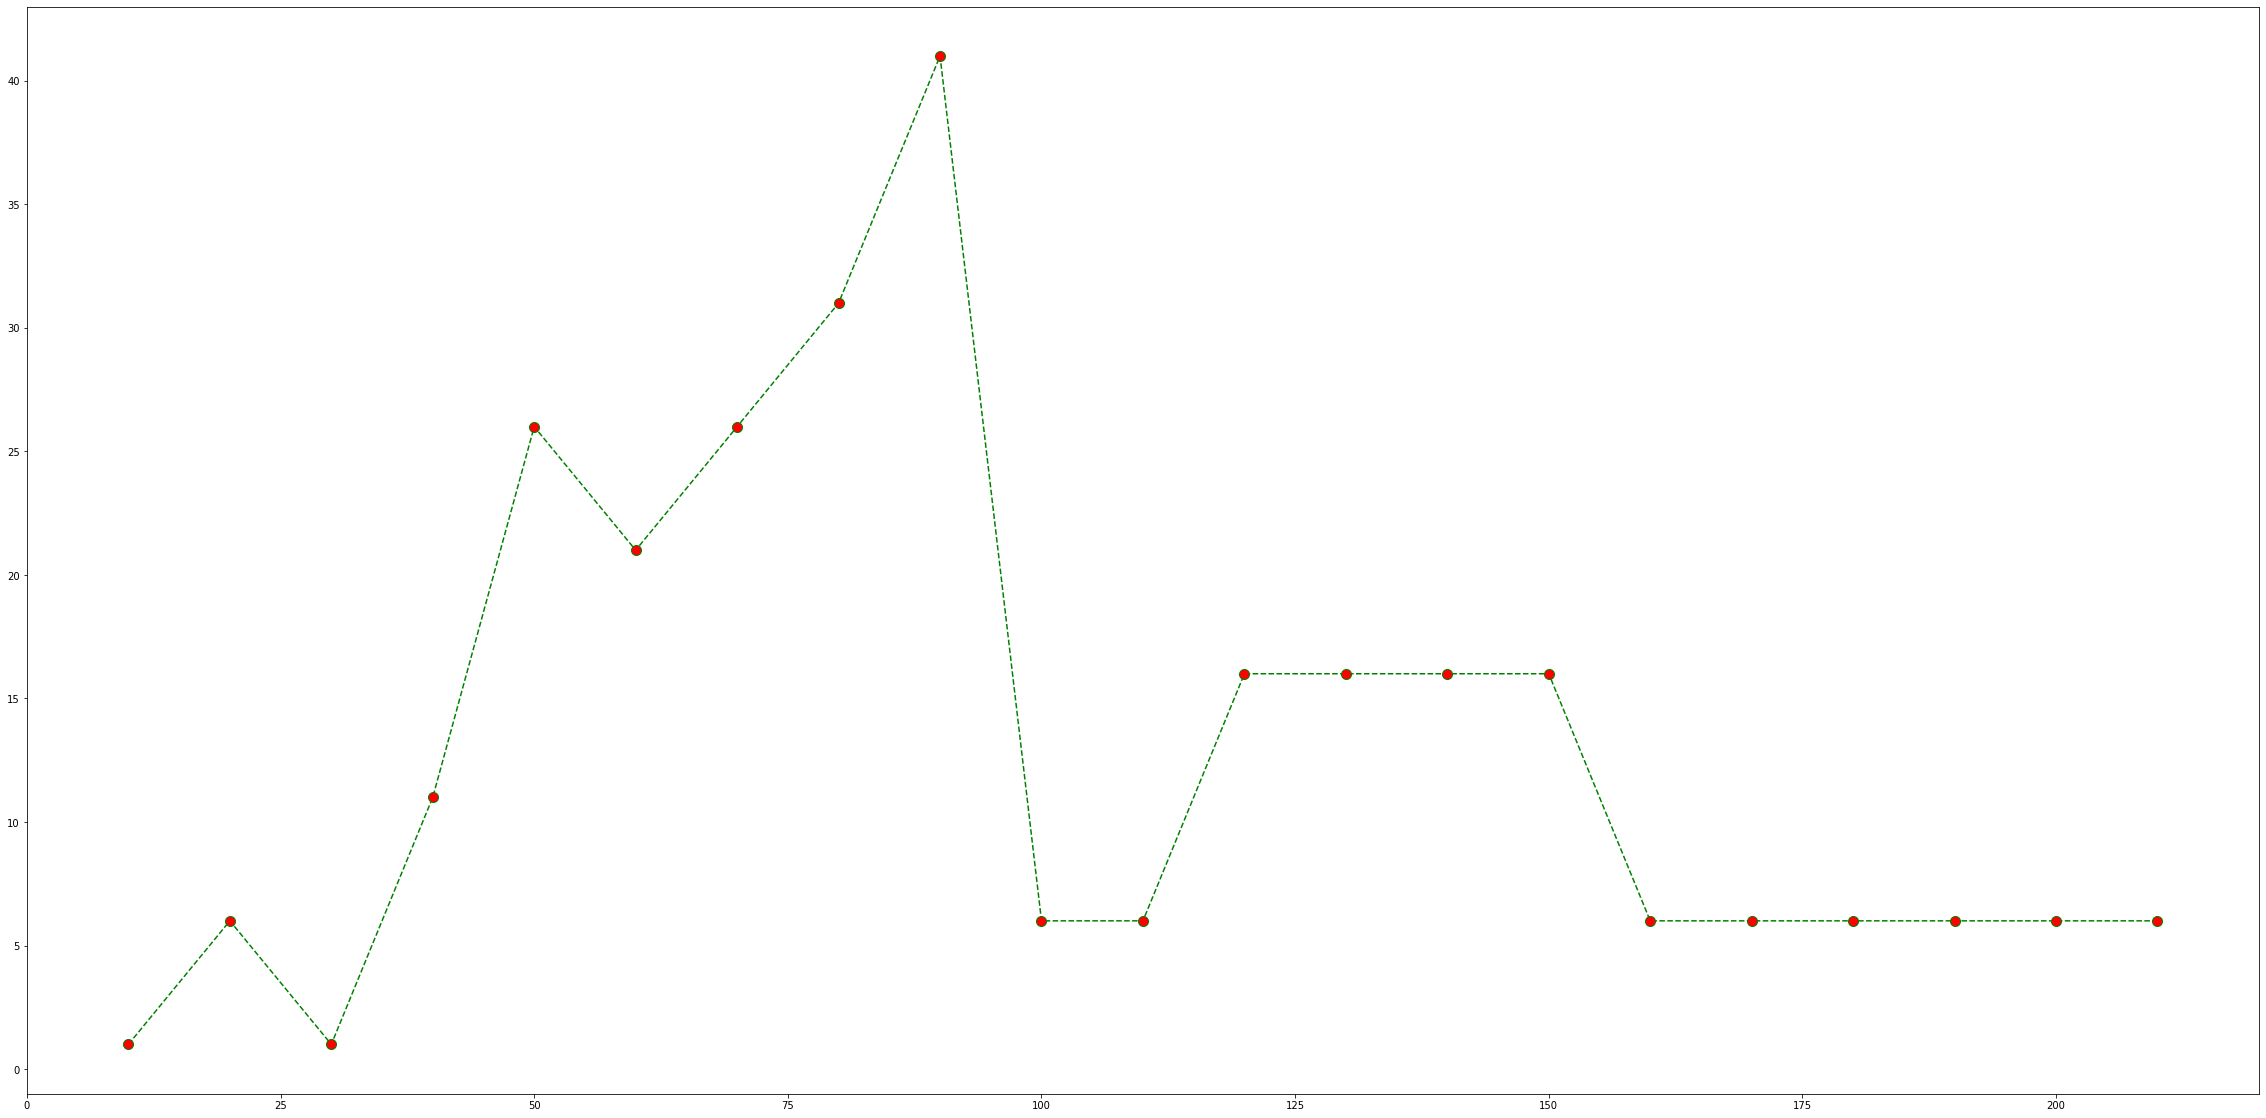

In [13]:
#Learning curver for N v/s value of k
plt.figure(figsize=(40, 20))
plt.plot(range(10, 220, 10), kvalue, color='green', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)

d) i) A) Minkowski Distance which becomes Manhattan Distance with p = 1.<br>
The best value of k = 6.<br> The minimum test error is:  0.10999999999999999


In [14]:
def distance(p):
    
    test_error_metric = []
    train_error_metric = []

    # Calculating test error for values of k from (1,196)
    for i in range(1, 201, 5):
        knn = KNeighborsClassifier(n_neighbors=i , p=p)
        knn.fit(train_x, train_y)
        pred_ip = knn.predict(test_x)
        test_error_metric.append(1-metrics.accuracy_score(test_y, pred_ip))
        print(i,1-metrics.accuracy_score(test_y, pred_ip))

    print('The minimum test error is: ',min(test_error_metric[1:]))  
    
    # Calculating test error for values of k from (1,196)
    for i in range(1, 201, 5):
        knn = KNeighborsClassifier(n_neighbors=i , p=p)
        knn.fit(train_x, train_y)
        pred_ipt = knn.predict(train_x)
        train_error_metric.append(1-metrics.accuracy_score(train_y, pred_ipt))
        print(i,1-metrics.accuracy_score(train_y, pred_ipt))

    print('The minimum train error is: ',min(train_error_metric[1:]))  
    
distance(1)

1 0.12
6 0.10999999999999999
11 0.10999999999999999
16 0.12
21 0.12
26 0.10999999999999999
31 0.12
36 0.13
41 0.13
46 0.13
51 0.14
56 0.13
61 0.15000000000000002
66 0.15000000000000002
71 0.14
76 0.14
81 0.16000000000000003
86 0.15000000000000002
91 0.19999999999999996
96 0.19999999999999996
101 0.21999999999999997
106 0.20999999999999996
111 0.22999999999999998
116 0.20999999999999996
121 0.21999999999999997
126 0.24
131 0.28
136 0.28
141 0.30000000000000004
146 0.30000000000000004
151 0.30000000000000004
156 0.30000000000000004
161 0.30000000000000004
166 0.30000000000000004
171 0.30000000000000004
176 0.30000000000000004
181 0.30000000000000004
186 0.30000000000000004
191 0.30000000000000004
196 0.30000000000000004
The minimum test error is:  0.10999999999999999
1 0.0
6 0.13809523809523805
11 0.1428571428571429
16 0.1333333333333333
21 0.14761904761904765
26 0.16666666666666663
31 0.16666666666666663
36 0.16190476190476188
41 0.16666666666666663
46 0.17142857142857137
51 0.171428571

d) i) B) With k=6 found in last part, best log10(p) = 0.6 <br>Minimum test error is:  0.06000000000000005

In [15]:
test_error_log = []
train_error_log = []

for value in np.arange(0.1, 1.1, 0.1):
    
    p = 10**value    #Calculating value of p from log10(p)

    # Calculating test error for values of k=6
    knn = KNeighborsClassifier(n_neighbors=6 , p=p)
    knn.fit(train_x, train_y)
    pred_log = knn.predict(test_x)
    test_error_log.append(1-metrics.accuracy_score(test_y, pred_log))
    print('for log10(p) = : ',value, ',test error is: ', 1-metrics.accuracy_score(test_y, pred_log))
    
print('Minimum test error is: ', min(test_error_log))  

for value in np.arange(0.1, 1.1, 0.1):
    
    p = 10**value
    
    # Calculating train error for values of k=6
    knn = KNeighborsClassifier(n_neighbors=6 , p=p)
    knn.fit(train_x, train_y)
    pred_logt = knn.predict(train_x)
    train_error_log.append(1-metrics.accuracy_score(train_y, pred_logt))
    print('for log10(p) = : ', value, ',train error is: ', 1-metrics.accuracy_score(train_y, pred_logt))
    
print('Minimum train error is: ', min(train_error_log))  

for log10(p) = :  0.1 ,test error is:  0.08999999999999997
for log10(p) = :  0.2 ,test error is:  0.08999999999999997
for log10(p) = :  0.30000000000000004 ,test error is:  0.07999999999999996
for log10(p) = :  0.4 ,test error is:  0.07999999999999996
for log10(p) = :  0.5 ,test error is:  0.07999999999999996
for log10(p) = :  0.6 ,test error is:  0.06000000000000005
for log10(p) = :  0.7000000000000001 ,test error is:  0.06999999999999995
for log10(p) = :  0.8 ,test error is:  0.07999999999999996
for log10(p) = :  0.9 ,test error is:  0.08999999999999997
for log10(p) = :  1.0 ,test error is:  0.08999999999999997
Minimum test error is:  0.06000000000000005
for log10(p) = :  0.1 ,train error is:  0.13809523809523805
for log10(p) = :  0.2 ,train error is:  0.14761904761904765
for log10(p) = :  0.30000000000000004 ,train error is:  0.1523809523809524
for log10(p) = :  0.4 ,train error is:  0.1523809523809524
for log10(p) = :  0.5 ,train error is:  0.14761904761904765
for log10(p) = :  0.6

d) i) C) Minkowski Distance which becomes Chebyshev Distance with p → ∞.<br> The best value of k = 16.<br> Minimum test error is:  0.07999999999999996

In [16]:
test_error_cheby = []
train_error_cheby = []

# Calculating test error for values of k from (1,196)
for i in range(1, 201, 5):
    knn = KNeighborsClassifier(n_neighbors=i , metric = 'chebyshev')
    knn.fit(train_x, train_y)
    pred_cheby = knn.predict(test_x)
    test_error_cheby.append(1-metrics.accuracy_score(test_y, pred_cheby))
    print(i, 1-metrics.accuracy_score(test_y, pred_cheby))

# Calculating train error for values of k from (1,196)
for i in range(1, 201, 5):
    knn = KNeighborsClassifier(n_neighbors=i , metric = 'chebyshev')
    knn.fit(train_x, train_y)
    pred_chebyt = knn.predict(train_x)
    train_error_cheby.append(1-metrics.accuracy_score(train_y, pred_chebyt))
    
print('Minimum test error is: ', min(test_error_cheby[1:]))      #k=16
print('Minimum train error is: ', min(train_error_cheby[1:])) 

1 0.13
6 0.08999999999999997
11 0.12
16 0.07999999999999996
21 0.10999999999999999
26 0.12
31 0.12
36 0.09999999999999998
41 0.13
46 0.12
51 0.12
56 0.12
61 0.14
66 0.13
71 0.14
76 0.10999999999999999
81 0.14
86 0.12
91 0.15000000000000002
96 0.14
101 0.18999999999999995
106 0.18000000000000005
111 0.18000000000000005
116 0.18000000000000005
121 0.20999999999999996
126 0.20999999999999996
131 0.25
136 0.28
141 0.30000000000000004
146 0.30000000000000004
151 0.30000000000000004
156 0.30000000000000004
161 0.30000000000000004
166 0.30000000000000004
171 0.30000000000000004
176 0.30000000000000004
181 0.30000000000000004
186 0.30000000000000004
191 0.30000000000000004
196 0.30000000000000004
Minimum test error is:  0.07999999999999996
Minimum train error is:  0.1333333333333333


d) ii) Mahalanobis Distance<br>
The best value of k=6.<br> Minimum test error is:  0.16000000000000003

In [17]:
test_error_maha = []
train_error_maha = []

# Calculating test error for values of k from (1,196)
for i in range(1, 201, 5):
    knn = KNeighborsClassifier(n_neighbors = i, algorithm='brute', 
                               metric='mahalanobis', 
                               metric_params={'V': train_x.cov()})
    knn.fit(train_x, train_y)
    pred_i_maha = knn.predict(test_x)
    test_error_maha.append(1-metrics.accuracy_score(test_y, pred_i_maha))
    print(i, 1-metrics.accuracy_score(test_y, pred_i_maha))

# Calculating train error for values of k from (1,196)
for i in range(1, 201, 5):
    knn = KNeighborsClassifier(n_neighbors = i, algorithm='brute', 
                               metric='mahalanobis', 
                               metric_params={'V': train_x.cov()})
    knn.fit(train_x, train_y)
    pred_i_mahat = knn.predict(train_x)
    train_error_maha.append(1-metrics.accuracy_score(train_y, pred_i_mahat))  

print('Minimum test error is: ', min(test_error_maha[1:]))
print('Minimum train error is: ',min(train_error_maha[1:]))

1 0.18000000000000005
6 0.16000000000000003
11 0.18999999999999995
16 0.19999999999999996
21 0.22999999999999998
26 0.20999999999999996
31 0.20999999999999996
36 0.22999999999999998
41 0.22999999999999998
46 0.24
51 0.25
56 0.26
61 0.26
66 0.26
71 0.27
76 0.27
81 0.25
86 0.27
91 0.28
96 0.26
101 0.28
106 0.29000000000000004
111 0.29000000000000004
116 0.29000000000000004
121 0.30000000000000004
126 0.30000000000000004
131 0.30000000000000004
136 0.30000000000000004
141 0.30000000000000004
146 0.30000000000000004
151 0.30000000000000004
156 0.30000000000000004
161 0.30000000000000004
166 0.30000000000000004
171 0.30000000000000004
176 0.30000000000000004
181 0.30000000000000004
186 0.30000000000000004
191 0.30000000000000004
196 0.30000000000000004
Minimum test error is:  0.16000000000000003
Minimum train error is:  0.11904761904761907


|Method      |Optimal k      |Test Error         |
|------------|---------------|-------------------|
|Manhattan   |6              |0.10999999999999999|
|Mahalanobis |6              |0.16000000000000003|
|Chebyshev   |16             |0.07999999999999996|

e) The best test errors when k ∈ {1,6,11,16,...,196} for following is: <br>
    Euclidean Distance: k=6, best test error rate = 0.09999999999999998<br>
    Manhatton Distance: k=26, best test error ratwe = 0.09999999999999998<br>
    Chebyshev Distance: k=16, best test error ratwe = 0.10999999999999999

In [18]:
#For Euclidean Distance
test_errorw = []
train_errorw = []

# Calculating test error for values of k from (1,196)
for i in range(1, 201, 5):
    knn = KNeighborsClassifier(n_neighbors=i, weights = 'distance')
    knn.fit(train_x, train_y)
    pred_i_testw = knn.predict(test_x)
    test_errorw.append(1-metrics.accuracy_score(test_y, pred_i_testw))

print('Minimum test error is: ', min(test_errorw[1:]))

# Calculating train error for values of k from (1,196)
for i in range(1, 201, 5):
    knn = KNeighborsClassifier(n_neighbors=i, weights = 'distance')
    knn.fit(train_x, train_y)
    pred_i_trainw = knn.predict(train_x)
    train_errorw.append(1-metrics.accuracy_score(train_y, pred_i_trainw))

Minimum test error is:  0.09999999999999998


In [19]:
#For Manhatton Distance
train_error_metricw = []
test_error_metricw = []

# Calculating test error for values of k from (1,196)
for i in range(1, 201, 5):
    knn = KNeighborsClassifier(n_neighbors=i , weights = 'distance', p=1)
    knn.fit(train_x, train_y)
    pred_manw = knn.predict(test_x)
    test_error_metricw.append(1-metrics.accuracy_score(test_y, pred_manw))

print('Minimum test error is: ', min(test_error_metricw[1:]))

# Calculating train error for values of k from (1,196)
for i in range(1, 201, 5):
    knn = KNeighborsClassifier(n_neighbors=i , weights = 'distance', p=1)
    knn.fit(train_x, train_y)
    pred_manwt = knn.predict(train_x)
    train_error_metricw.append(1-metrics.accuracy_score(train_y, pred_manwt))

Minimum test error is:  0.09999999999999998


In [20]:
#For Chebyshev Distance
test_error_chebyw = []
train_error_chebyw = []

# Calculating test error for values of k from (1,196)
for i in range(1, 201, 5):
    knn = KNeighborsClassifier(n_neighbors=i , weights = 'distance', metric = 'chebyshev')
    knn.fit(train_x, train_y)
    pred_chebyw = knn.predict(test_x)
    test_error_chebyw.append(1-metrics.accuracy_score(test_y, pred_chebyw))

print('Minimum test error is: ', min(test_error_chebyw[1:]))

# Calculating train error for values of k from (1,196)
for i in range(1, 201, 5):
    knn = KNeighborsClassifier(n_neighbors=i , weights = 'distance', metric = 'chebyshev')
    knn.fit(train_x, train_y)
    pred_chebywt = knn.predict(train_x)
    train_error_chebyw.append(1-metrics.accuracy_score(train_y, pred_chebywt))

Minimum test error is:  0.10999999999999999


f) The lowest training error rate I achieved in this homework is 0 for k=1.
   Generally we avoid taking k=1, in that case, the lowest training error rate would be 0.11904761904761907 for k=6 found in question d)ii) Mahalanobis Distance.